In [2]:
import numpy as np
import pandas as pd
from src import util
from src.linear_model import LinearModel

In [5]:
train_path_1 = 'data/ds1_train.csv'
valid_path_1 = 'data/ds1_valid.csv'
train_path_2 = 'data/ds2_train.csv'
valid_path_2 = 'data/ds2_valid.csv'

x_train, y_train = util.load_dataset(train_path_1, add_intercept=True)
x_valid, y_valid = util.load_dataset(valid_path_1, add_intercept=True)

In [6]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.
    Epsilon set to 1E-5 for convergance

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        def h(x, theta):
            z = np.dot(x, theta)
            return 1/(1 + np.exp(-z))

        def gradient_theta_j(x, y, theta):
            return -1/m * np.dot(x.T, (y-h(x, theta)))

        def hessian(x, theta):
            '''
            Reshape hypothesis function to (m,1)
            '''
            h_ = np.reshape(h(x,theta), (-1, 1))
            return 1/m * (np.dot(x.T, h_ * (1-h_) * x))

        def theta_update(x, y, theta):
            return theta - np.dot(np.linalg.inv(hessian(x, theta)), gradient_theta_j(x, y, theta))

        m, n = x.shape
        self.theta = np.zeros(n)
        self.results = np.array(self.theta)
        self.epsilon = 0.00001
        theta = self.theta
        theta_new = theta_update(x, y, theta)
        self.results = np.vstack([self.results, theta_new])
        max_iterations = 15
        i = 0
        while np.linalg.norm(theta_new - theta, 1) >= self.epsilon and i < max_iterations:
            self.results = np.vstack([self.results, theta_new])
            print(np.linalg.norm(theta_new - theta))
            i += 1
            theta = theta_new
            theta_new = theta_update(x, y, theta)

        self.theta = theta_new
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***

        return np.dot(x, self.theta) >= 0


        # *** END CODE HERE ***


In [7]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

3.405452567499557
1.6970622911118969
1.129332411842062
0.44826913062280127
0.05513740883628169
0.0007382681812173282


Accuracy: 0.8825


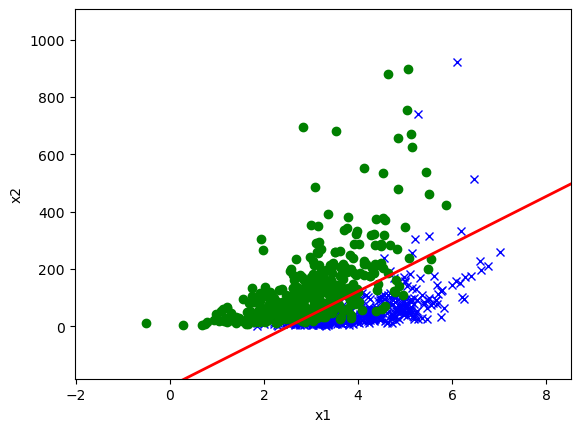

In [9]:
util.plot(x_train, y_train, theta=log_reg.theta)
print("Accuracy:", np.mean(log_reg.predict(x_train) == y_train))

Accuracy: 0.9


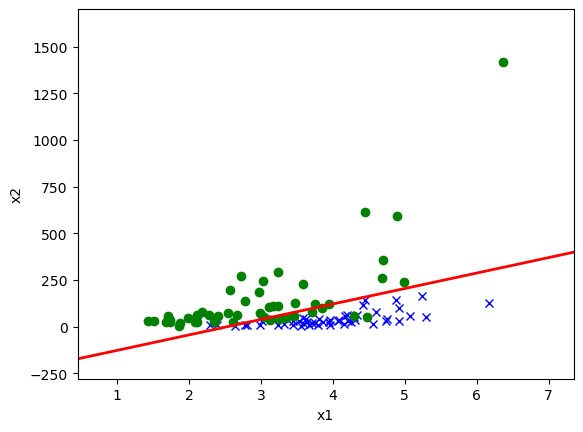

In [11]:
util.plot(x_valid, y_valid, theta=log_reg.theta)
print("Accuracy:", np.mean(log_reg.predict(x_valid) == y_valid))